In [3]:
%matplotlib inline
import quandl, math
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as sm
from tsmom_model import *
import numpy as np
from datetime import datetime
token="Us3wFmXGgAj_1cUtHAAR"

import pylab
sns.set(font_scale=3)
pylab.rcParams['figure.figsize'] = (24, 18)

In [4]:
CME_contracts =['SB','JO','LB','KC','CT','CC','RR','SI','PL','HG','GC','DA','PB','HE',
                'LC','FC','US','TY','TU','MB','FV','ED','YU','SP','RL','ND','MV','KV',
                'DJ','W','SM','S','O','MW','KW','C','BO','ITCO','RB','NG','HU','HO',
                'CL','SF','JY','EU','DX','CD','BP','AD']

In [5]:
map={'BO':'Soybean Oil',
'C':'Corn',
'CC':'CSCE-COCOA',
'CL':'NYM-LIGHT CRUDE OIL',
'CT':'Cotton',
'DA':'CME-MILK CLASS III GLOBEX',
'DX':'FINEX-US DOLLAR INDEX',
'ED':'CME-3 MTH EURODOLLAR COMP.',
'FC':'Feeder Cattle',aa
'FV':'CBT-5 YEAR US T-NOTE COMP.',
'GC':'CMX-GOLD 100 OZ',
'HG':'CMX-HIGH GRADE COPPER',
'KC':'CSCE-COFFEE \'C\'',
'KW':'KCBT-WHEAT',
'LB':'CME-LUMBER',
'LC':'CME-LIVE CATTLE COMP.',
'ND':'Nasdaq',
'NG':'NYM-NATURAL GAS',
'PL':'NYM-PLATINUM',
'RB':'RBOB Gasoline',
'RR':'CBT-ROUGH RICE',
'S':'CBT-SOYABEANS',
'SB':'CSCE-SUGAR #11',
'SF':'CME-SWISS FRANC COMP.',
'SI':'CMX-SILVER 5000 OZ',
'SM':'CBT-SOYABEAN MEAL',
'SP':'CME-MINI S&P 500 INDEX',
'TU':'CBT-2 YEAR US T-NOTE COMP.',
'TY':'CBT-10 YRS US T-NOTE COMP.',
'US':'CBT-30 YR US T-BOND COMP',
'W':'CBT-WHEAT C.01 DEA'}

In [6]:
COT_long=pd.DataFrame()
COT_short=pd.DataFrame()
COT_OI=pd.DataFrame()
for c in CME_contracts:
    ticker='CFTC/'+c+'_F_L_ALL'
    try:
        d=quandl.get(ticker,authtoken=token)
        COT_long[map[c]]= d['Noncommercial Long']
        COT_short[map[c]]= d['Noncommercial Short']
        COT_OI[map[c]]= d['Open Interest']
    except:
        print c

JO
PB
HE
MB
YU
RL
MV
KV
DJ
O
MW
ITCO
HU
HO
JY
EU
CD
BP
AD


/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()


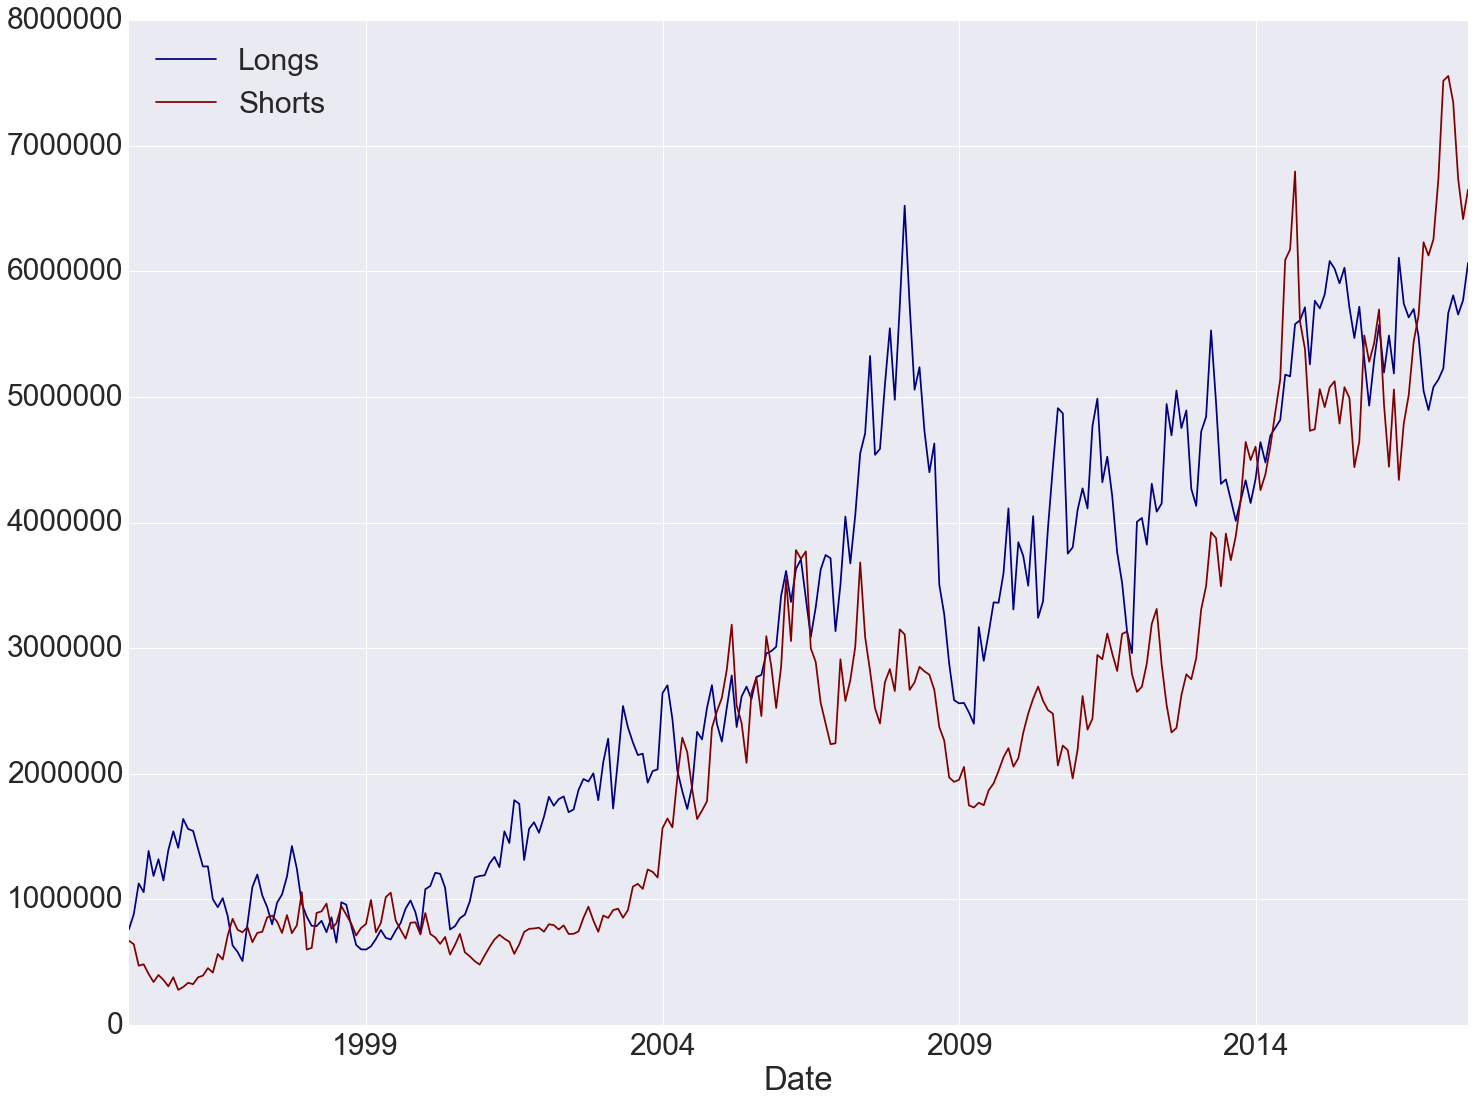

In [19]:
futures=pd.DataFrame()
futures['Longs']=COT_long.sum(axis=1)
futures['Shorts']=COT_short.sum(axis=1)
futures.resample(rule='m',how='last').plot(colormap='jet')

/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  if __name__ == '__main__':


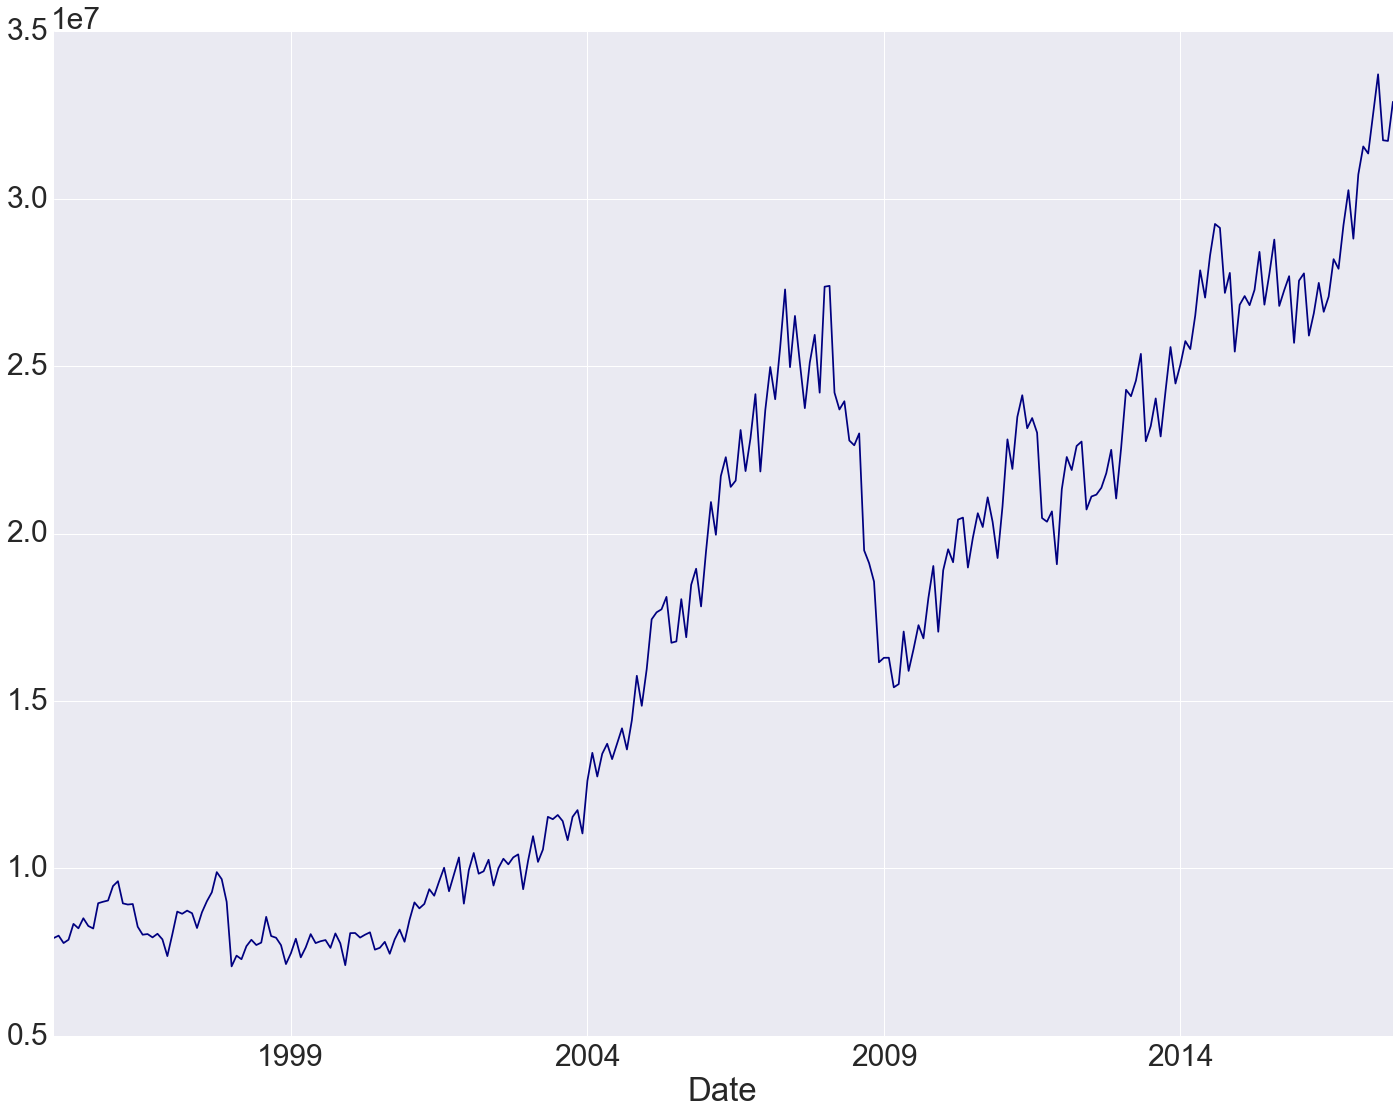

In [7]:
(COT_OI).sum(axis=1).resample(rule='m',how='last').plot(colormap='jet')

In [8]:
COT=pd.DataFrame()
for c in CME_contracts:
    ticker='CFTC/'+c+'_F_L_ALL'
    try:
        d=quandl.get(ticker,authtoken=token)
        x=(d['Noncommercial Long']-d['Noncommercial Short'])
        COT[map[c]]=x/(d['Open Interest'])
    except:
        print c

JO
PB
HE
MB
YU
RL
MV
KV
DJ
O
MW
ITCO
HU
HO
JY
EU
CD
BP
AD


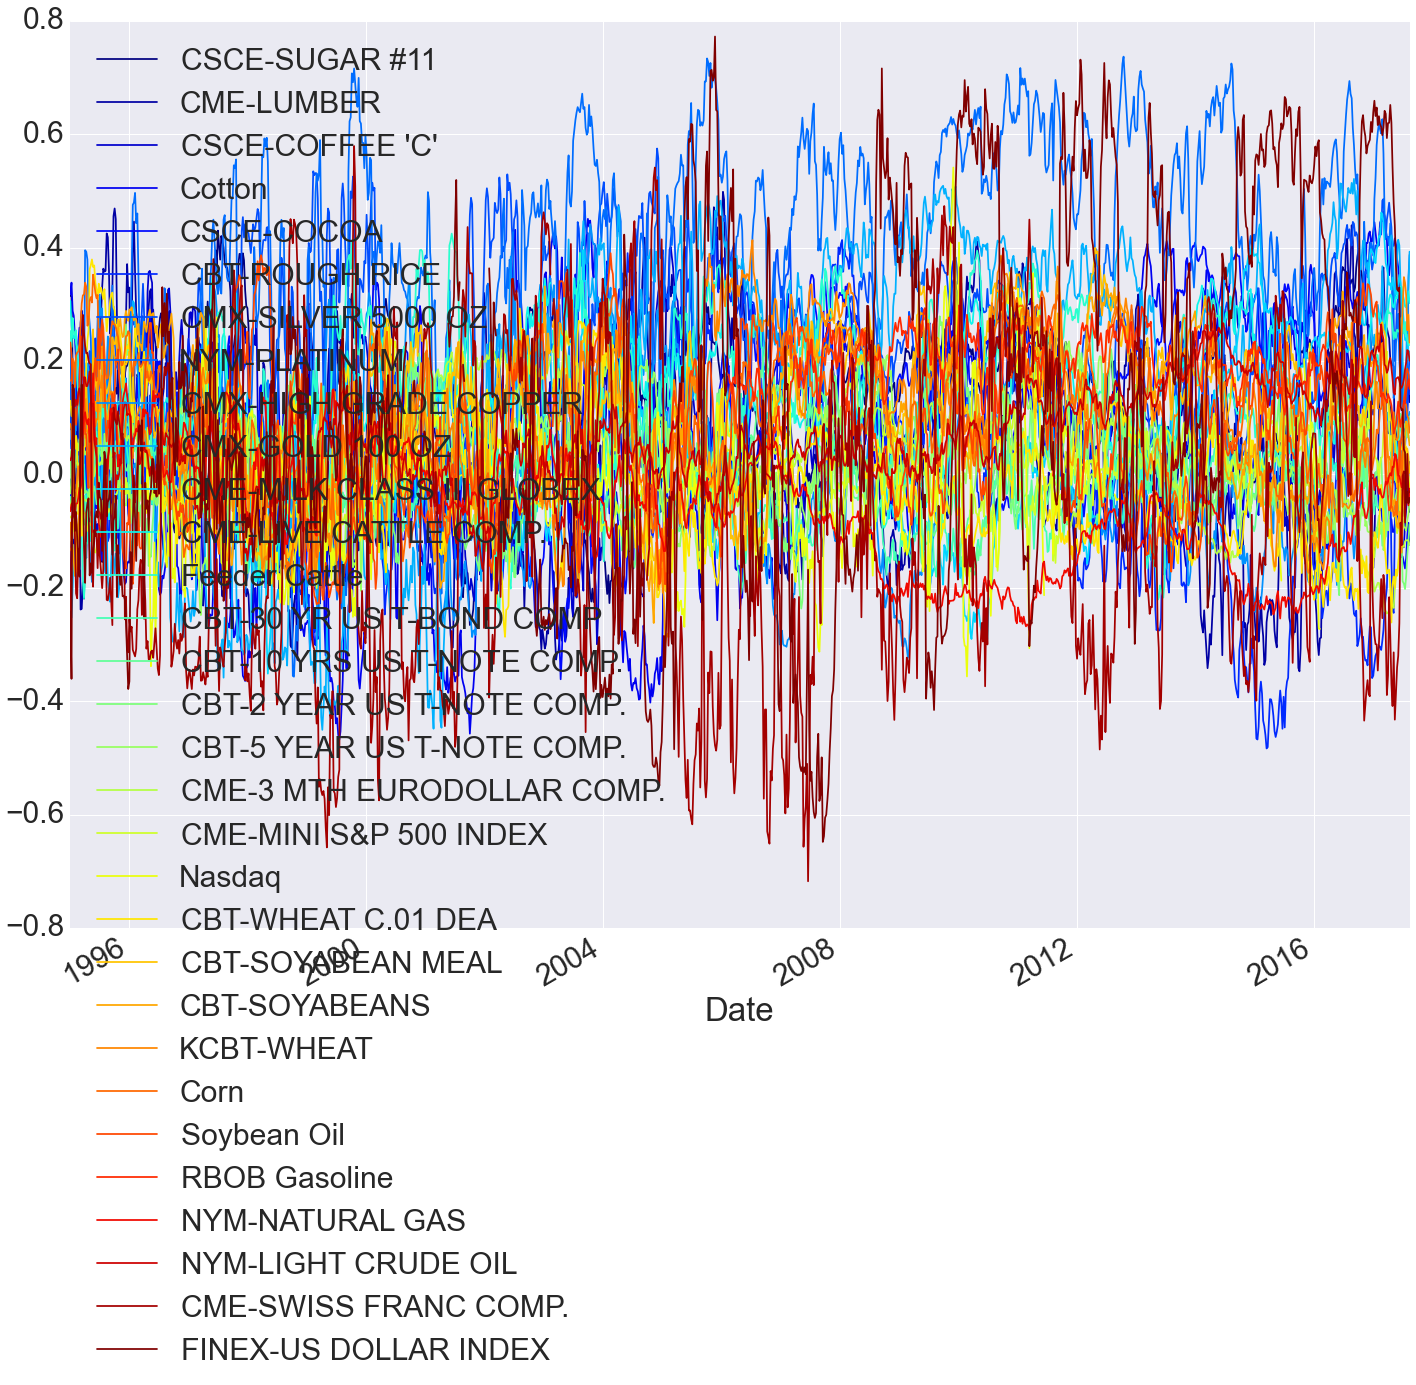

In [9]:
COT.plot(colormap='jet')

In [10]:
cleansed=load_amihud_markets_price()
amihud=calculate_amihud_liquidity(cleansed)[:'2016'] 

tsmom_model.py:146: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  data=pd.read_csv('Price.csv',index_col=0,parse_dates=['Date']).resample(rule='d',how='last')
tsmom_model.py:148: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  qd=pd.read_csv('liquid_contracts.csv',index_col=0,parse_dates=['Date']).resample(rule='d',how='last')
tsmom_model.py:29: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  data=pd.read_csv('Volume.csv',index_col=0,parse_dates=['Date']).resample(rule='d',how='mean')
tsmom_model.py:31: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  v=pd.read_csv('volume_data.csv',index_col=0,parse_dates=['Date']).resample(rule='d',how='sum')
tsmom_model.py:33: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(min_periods=100,window=250,

In [11]:
ind=amihud.dropna(how='all').index
mon=(COT.resample(rule='m',how='last')/COT.resample(rule='m',how='last').abs()).ix[ind]

/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  from IPython.kernel.zmq import kernelapp as app


In [12]:
LG=pd.Series()
SH=pd.Series()
for r in mon.iterrows():
    LG[r[0]]=amihud[r[1][r[1]>0].index].ix[r[0]].dropna().median()
    SH[r[0]]=amihud[r[1][r[1]<0].index].ix[r[0]].dropna().median()
liquidity=pd.DataFrame()
liquidity['Speculators Long']=LG
liquidity['Speculators Short']=SH

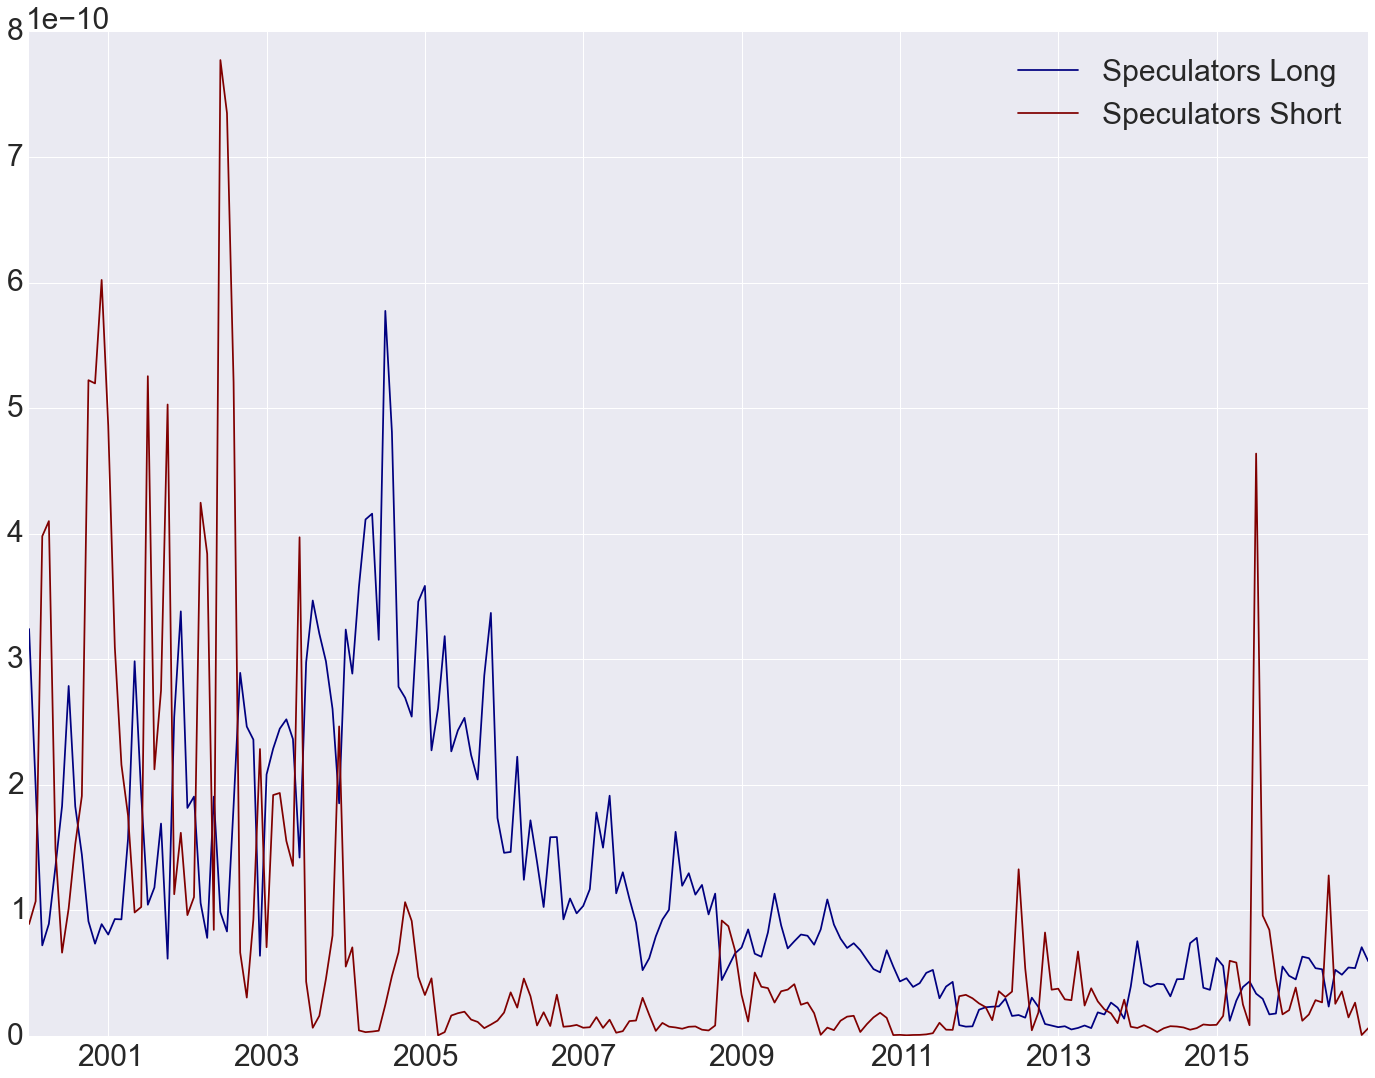

In [13]:
liquidity['2000':].plot(colormap='jet')

In [14]:
raw=cleansed.resample(rule='m',how='last').pct_change()
LG=pd.Series()
SH=pd.Series()
for r in mon.iterrows():
    LG[r[0]]=raw[r[1][r[1]>0].index].ix[r[0]].dropna().shift(1).median()
    SH[r[0]]=raw[r[1][r[1]<0].index].ix[r[0]].dropna().shift(1).median()
returns=pd.DataFrame()
returns['Speculators Long']=LG
returns['Speculators Short']=SH

/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  if __name__ == '__main__':


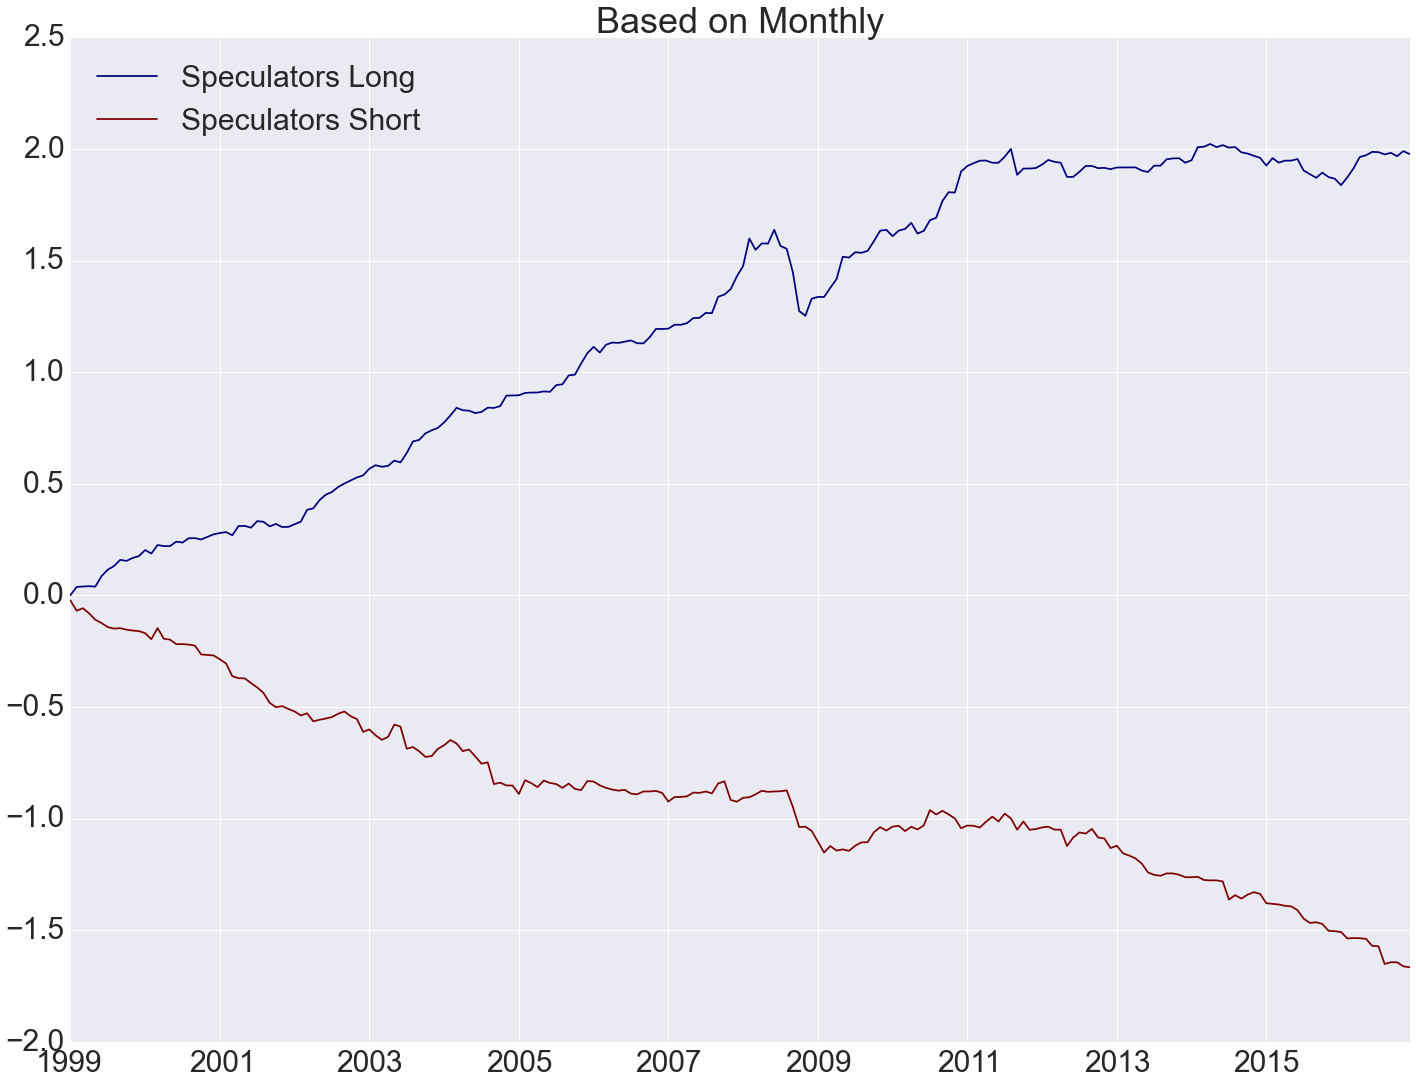

In [15]:
returns.cumsum().plot(colormap='jet',title='Based on Monthly')

In [16]:
ind=COT.index
raw=cleansed.ffill().ix[ind].pct_change()
LG=pd.Series()
SH=pd.Series()
for r in COT.iterrows():
    LG[r[0]]=raw[r[1][r[1]>0].index].ix[r[0]].dropna().shift(1).median()
    SH[r[0]]=raw[r[1][r[1]<0].index].ix[r[0]].dropna().shift(1).median()
rets=pd.DataFrame()
rets['Speculators Long']=LG
rets['Speculators Short']=SH

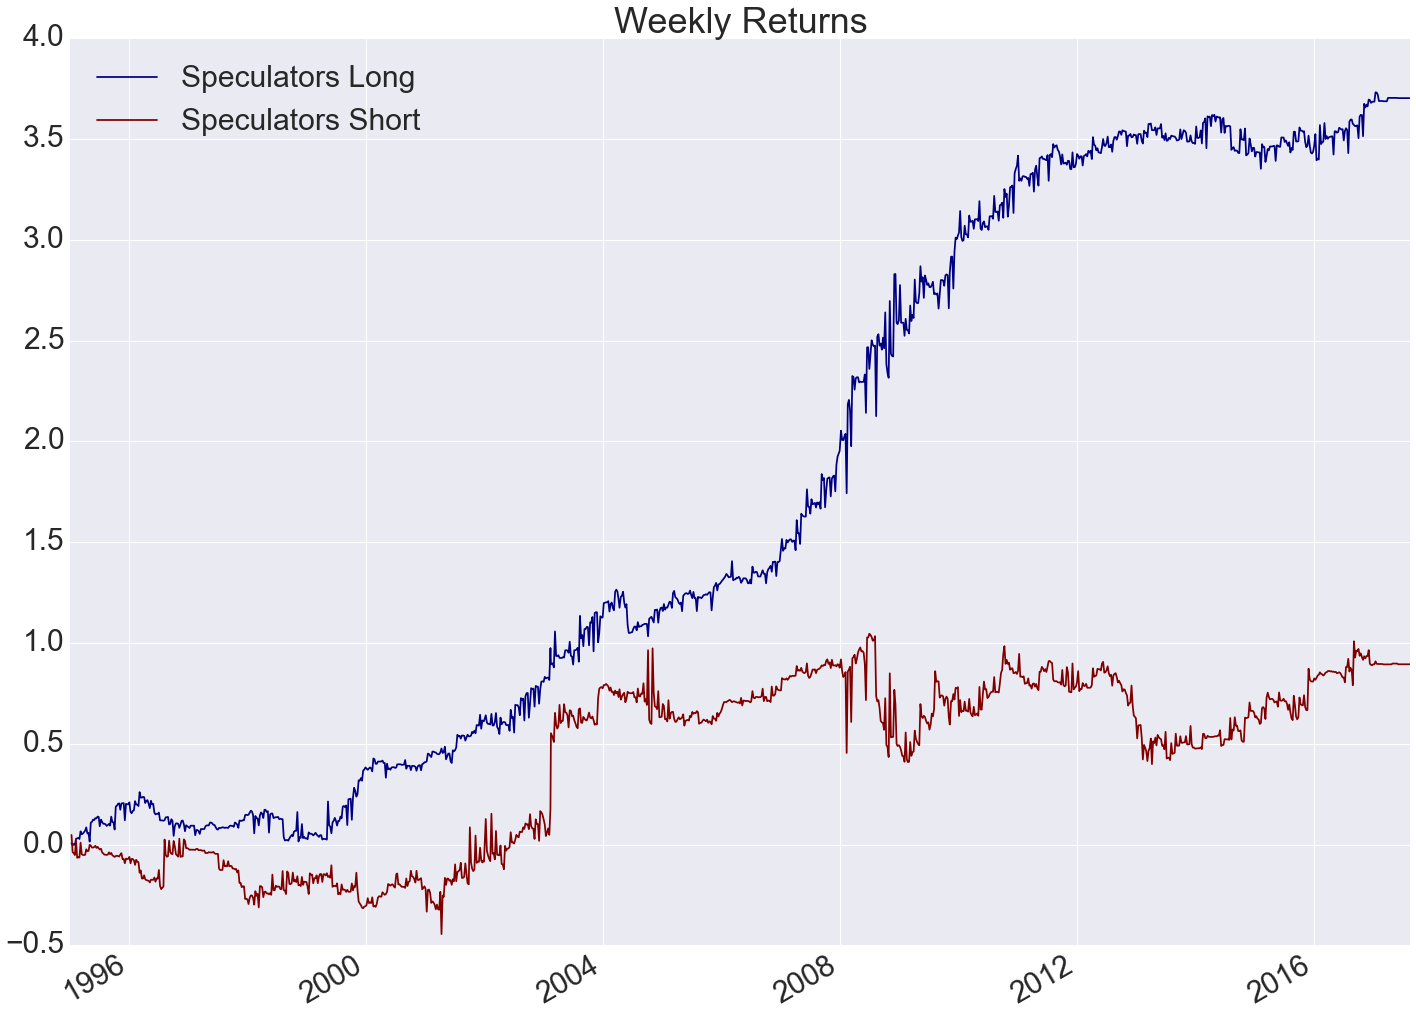

In [17]:
rets.cumsum().plot(colormap='jet',title='Weekly Returns')

Potential avenues

* Do you see the rise of absolute values of speculators?
* Do we want to use the post 2007 data which has more inputs
* 